 # 📊 Social Media Project

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv(r"C:\Users\Bhavana\OneDrive\Documents\DataAnalytics\InstaProject\instagram_data.csv")
df.shape
df.head()

,Post_ID,Post_Date,Platform,Hashtag,Content_Type,Region,Views,Likes,Shares,Comments,Engagement_Level
0,Post_1,2022-01-13,TikTok,#Challenge,Video,UK,4163464,339431,53135,19346,High
1,Post_2,2022-05-13,Instagram,#Education,Shorts,India,4155940,215240,65860,27239,Medium
2,Post_3,2022-01-07,Twitter,#Challenge,Video,Brazil,3666211,327143,39423,36223,Medium
3,Post_4,2022-12-05,YouTube,#Education,Shorts,Australia,917951,127125,11687,36806,Low
4,Post_5,2023-03-23,TikTok,#Dance,Post,Brazil,64866,171361,69581,6376,Medium


 ## 🧹 Data Cleaning

In [19]:
df.info()
df.isnull().sum() #check missing values

df = df.drop_duplicates()
print("Duplicates removed. New shape:", df.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Post_ID           5000 non-null   object        
 1   Post_Date         5000 non-null   datetime64[ns]
 2   Platform          5000 non-null   object        
 3   Hashtag           5000 non-null   object        
 4   Content_Type      5000 non-null   object        
 5   Region            5000 non-null   object        
 6   Views             5000 non-null   int64         
 7   Likes             5000 non-null   int64         
 8   Shares            5000 non-null   int64         
 9   Comments          5000 non-null   int64         
 10  Engagement_Level  5000 non-null   object        
dtypes: datetime64[ns](1), int64(4), object(6)
memory usage: 429.8+ KB
Duplicates removed. New shape: (5000, 11)


In [20]:
# Convert Post Date to datetime
df['Post_Date'] = pd.to_datetime(df['Post_Date'], errors='coerce')

# Sort by date
df = df.sort_values(by='Post_Date')
print(df['Post_Date'])

1755   2022-01-01
1990   2022-01-01
4008   2022-01-01
878    2022-01-01
1994   2022-01-02
          ...    
2774   2023-12-30
1586   2023-12-30
1577   2023-12-30
698    2023-12-30
2016   2023-12-30
Name: Post_Date, Length: 5000, dtype: datetime64[ns]


In [24]:
# Convert numeric columns (Likes, Comments, Shares)
for col in ['Likes', 'Comments', 'Shares']:
    df[col] = pd.to_numeric(df[col], errors='coerce').fillna(0).astype(int)
    
#Make sure engagement columns are integers for calculations.

In [35]:
#Handle missing values
# If hashtags are missing, replace with "None"

df['Hashtag'] = df['Hashtag'].fillna("None")

#Standardize text data
# Lowercase & remove extra spaces from hashtags and captions
df['Hashtags'] = df['Hashtag'].str.lower().str.strip()
df['Platform'] = df['Platform'].str.lower().str.strip()

print(df.head())

        Post_ID  Post_Date Platform   Hashtag Content_Type  Region    Views  \
1755  Post_1756 2022-01-01  youtube  #Fitness  Live Stream     USA  3150317   
1990  Post_1991 2022-01-01  youtube     #Tech         Post      UK  1060377   
4008  Post_4009 2022-01-01  youtube   #Comedy         Post  Canada   721858   
878    Post_879 2022-01-01  twitter  #Fitness         Post  Brazil  3536654   
1994  Post_1995 2022-01-02   tiktok    #Music         Post     USA   986920   

       Likes  Shares  Comments Engagement_Level  Hashtags  
1755  265173   11352     30489              Low  #fitness  
1990  361801   39128     17226           Medium     #tech  
4008  449162   91563     10392             High   #comedy  
878   292882    7966     37642           Medium  #fitness  
1994  320547   73945     11000             High    #music  


 ## Exploratory Data Analysis (EDA)

In [39]:
#Platform wise totals
platform_stats = df.groupby('Platform').agg({ 'Views' : 'sum', 'Likes' : 'sum', 'Shares' : 'sum', 'Comments' : 'sum'}).reset_index()
#Calculate average engagement rate
platform_stats['Engagement_Level'] = ((platform_stats['Likes'] + platform_stats['Comments'] + platform_stats['Shares']) / platform_stats['Views']) * 100
#Display sorted by Engagement Rate
platform_stats = platform_stats.sort_values(by='Engagement_Level', ascending=False)

print(platform_stats)

    Platform       Views      Likes    Shares  Comments  Engagement_Level
0  instagram  2913744812  311627280  60976822  30249234         13.825965
3    youtube  3370438480  342007739  66296773  33525521         13.108978
2    twitter  3017229522  296039663  60474212  29446056         12.791865
1     tiktok  3168919406  307700467  64850003  31221158         12.741619


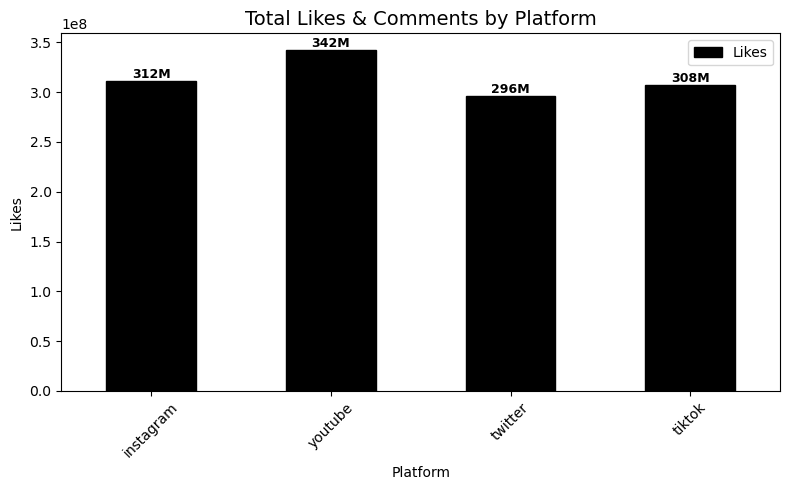

In [56]:
#Total Likes

def human_format(num):
    for unit in ['', 'K', 'M', 'B']:
        if abs(num) < 1000:
            return f"{num:.0f}{unit}"
        num /= 1000
    return f"{num:.1f}B"

fig, ax = plt.subplots(figsize=(8,5))
platform_stats.plot(
    x='Platform',
    y=['Likes'],
    kind='bar',
    color='black',
    edgecolor='black',
    ax=ax
)

# Add human-readable labels
for container in ax.containers:
    labels = [human_format(v) for v in container.datavalues]
    ax.bar_label(container, labels=labels, fontsize=9, fontweight='bold')

plt.title('Total Likes & Comments by Platform', fontsize=14)
plt.xlabel('Platform')
plt.ylabel('Likes')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


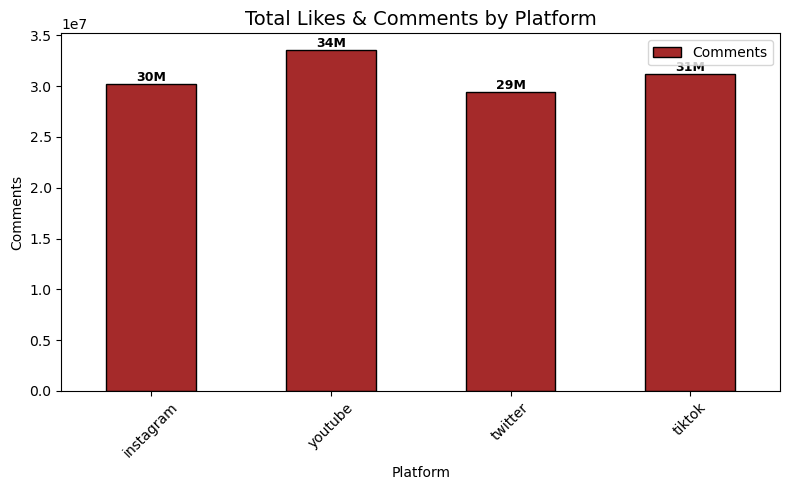

In [60]:
#Total Comments

def human_format(num):
    for unit in ['', 'K', 'M', 'B']:
        if abs(num) < 1000:
            return f"{num:.0f}{unit}"
        num /= 1000
    return f"{num:.1f}B"

fig, ax = plt.subplots(figsize=(8,5))
platform_stats.plot(
    x='Platform',
    y=['Comments'],
    kind='bar',
    color='brown',
    edgecolor='black',
    ax=ax
)

# Add human-readable labels
for container in ax.containers:
    labels = [human_format(v) for v in container.datavalues]
    ax.bar_label(container, labels=labels, fontsize=9, fontweight='bold')

plt.title('Total Likes & Comments by Platform', fontsize=14)
plt.xlabel('Platform')
plt.ylabel('Comments')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


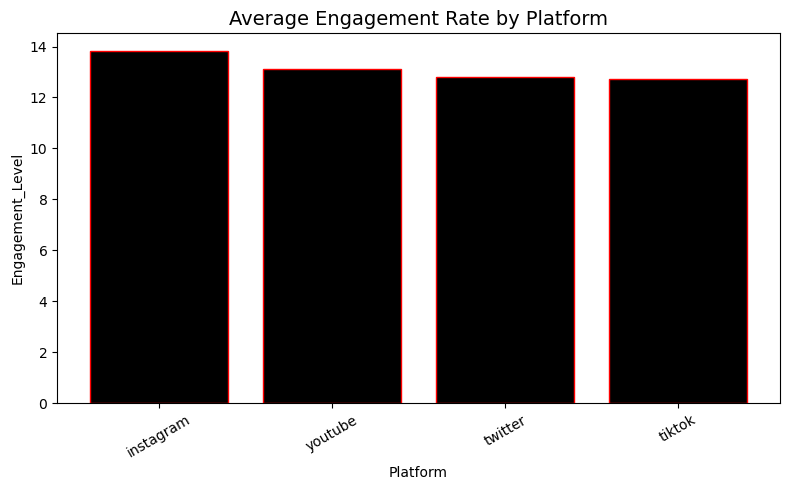

In [49]:
# 5. Visualization - Engagement Rate
plt.figure(figsize=(8,5))
plt.bar(platform_stats['Platform'], platform_stats['Engagement_Level'], color='black', edgecolor='red')
plt.title('Average Engagement Rate by Platform', fontsize=14)
plt.xlabel('Platform')
plt.ylabel('Engagement_Level')
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()

        Post_ID   Platform     Hashtag    Views   Likes  Shares  Comments  \
2907  Post_2908  Instagram  #Challenge  4498056  491674   95872     47593   
4960  Post_4961  Instagram       #Tech  2964544  487730   97256     45944   
3619  Post_3620    YouTube      #Dance  3371356  496848   84583     49391   
1871  Post_1872  Instagram       #Tech   301575  492868   95534     42034   
556    Post_557  Instagram    #Fitness   129205  493844   93705     39629   
2864  Post_2865  Instagram      #Viral  1831119  491782   86681     48075   
4759  Post_4760    YouTube      #Music  2050005  495359   98876     31147   
2492  Post_2493    Twitter    #Fashion  3802774  499236   96550     28438   
3016  Post_3017    Twitter    #Fashion  1072473  485342   96891     40353   
8        Post_9    Twitter  #Education  2169523  496078   96041     30174   

      Engagement_Score  
2907            635139  
4960            630930  
3619            630822  
1871            630436  
556             627178  
28

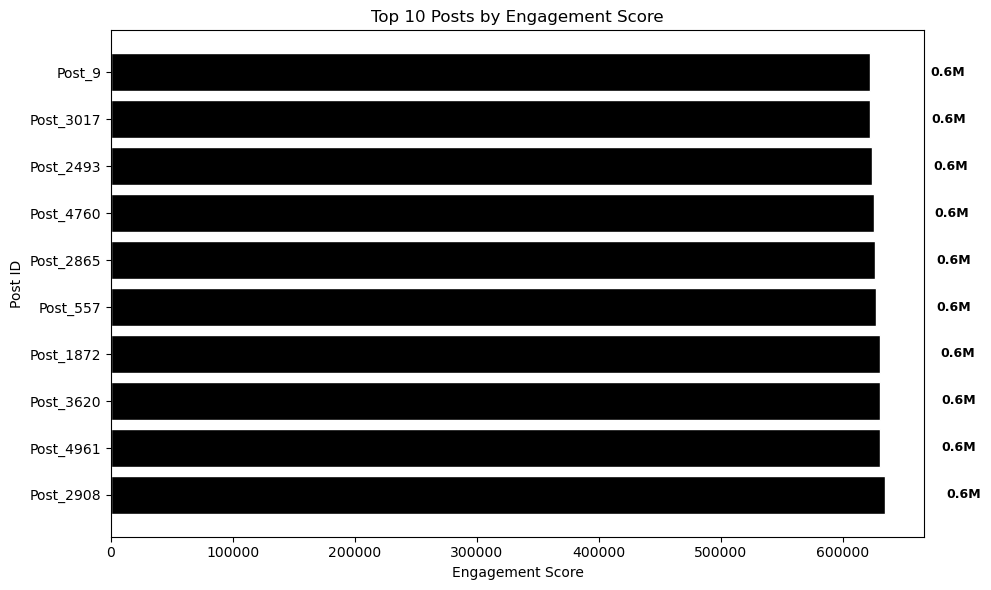

In [8]:
#Top-performing posts by engagement

#engagement_score calculation
df['Engagement_Score'] = df['Likes'] + df['Shares'] + df['Comments']
#top 10 posts
top_posts = df.sort_values(by='Engagement_Score', ascending=False).head(10)
#results
print(top_posts[['Post_ID', 'Platform', 'Hashtag', 'Views', 'Likes', 'Shares', 'Comments', 'Engagement_Score']])

# Plot
plt.figure(figsize=(10,6))
plt.barh(top_posts['Post_ID'], top_posts['Engagement_Score'], color='black', edgecolor='white')
plt.xlabel('Engagement Score')
plt.ylabel('Post ID')
plt.title('Top 10 Posts by Engagement Score')

#Add labels
for i, v in enumerate(top_posts['Engagement_Score']):
    plt.text(v + 50000, i, f"{v/1e6:.1f}M", va='center', fontsize=9, fontweight='bold')

plt.tight_layout()
plt.show()

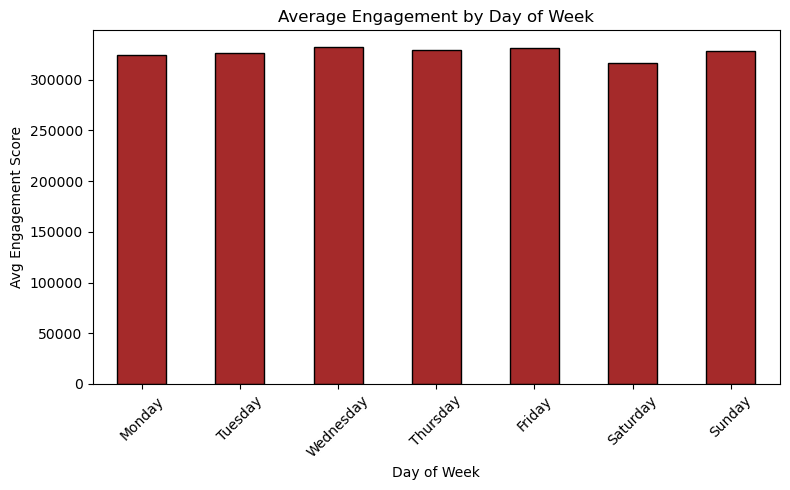

In [22]:
#Engagement by Day of Week 
# ✅ Convert Post_Date to datetime first
df['Post_Date'] = pd.to_datetime(df['Post_Date'], errors='coerce')

# Day of week 
df['DayOfWeek'] = df['Post_Date'].dt.day_name()

# Hour of posting
df['Hour'] = df['Post_Date'].dt.hour

df['Engagement_Score'] = df['Likes'] + df['Shares'] + df['Comments']

engagement_by_day = df.groupby('DayOfWeek')['Engagement_Score'].mean().reindex(
    ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
)

# Plot
plt.figure(figsize=(8,5))
engagement_by_day.plot(kind='bar', color='brown', edgecolor='black')
plt.title('Average Engagement by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Avg Engagement Score')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

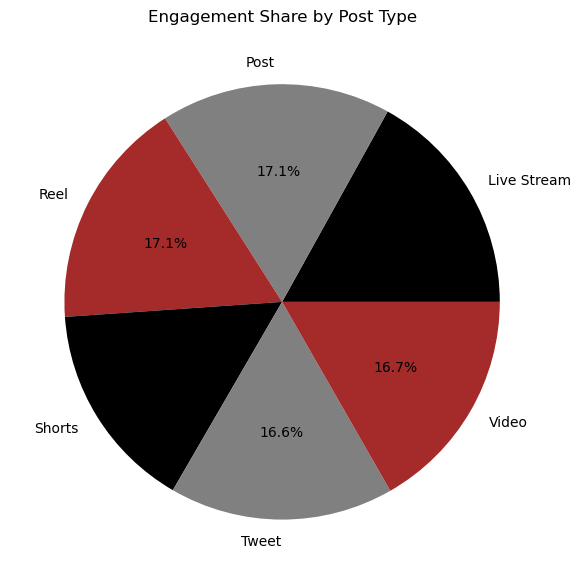

In [25]:
#Post type performance (Reel, Story, Carousel).
# Group by Content Type
post_type_perf = df.groupby('Content_Type')['Engagement_Score'].mean().sort_values(ascending=False)
# Optional Pie Chart
plt.figure(figsize=(6,6))
df.groupby('Content_Type')['Engagement_Score'].sum().plot(
    kind='pie', autopct='%1.1f%%', colors=['black','gray','brown'])
plt.title('Engagement Share by Post Type')
plt.ylabel('')
plt.tight_layout()
plt.show()


Hashtag
#Education    336857.047619
#Tech         334433.908350
#Fitness      328845.938433
#Dance        328607.891129
#Comedy       327832.681188
#Viral        325169.896050
#Fashion      325133.845996
#Music        324002.941176
#Gaming       319512.645094
#Challenge    317602.717949
Name: Engagement_Score, dtype: float64


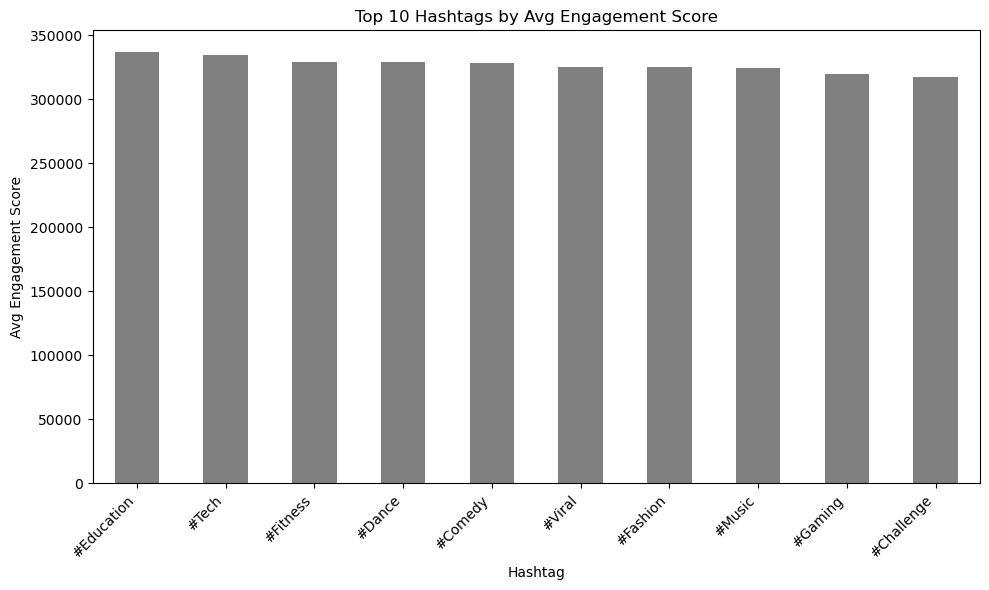

In [32]:
#Hashtag frequency analysis.
# Hashtag performance
hashtag_perf = df.groupby('Hashtag')['Engagement_Score'].mean().sort_values(ascending=False)
print(hashtag_perf.head(10))  # Top 10 hashtags

top_hashtags = hashtag_perf.head(10)

plt.figure(figsize=(10,6))
top_hashtags.plot(kind='bar', color='gray')
plt.title('Top 10 Hashtags by Avg Engagement Score')
plt.xlabel('Hashtag')
plt.ylabel('Avg Engagement Score')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()



Platform
YouTube      333708.484139
Instagram    332387.240924
Twitter      320564.726744
TikTok       320453.673016
Name: Engagement_Score, dtype: float64


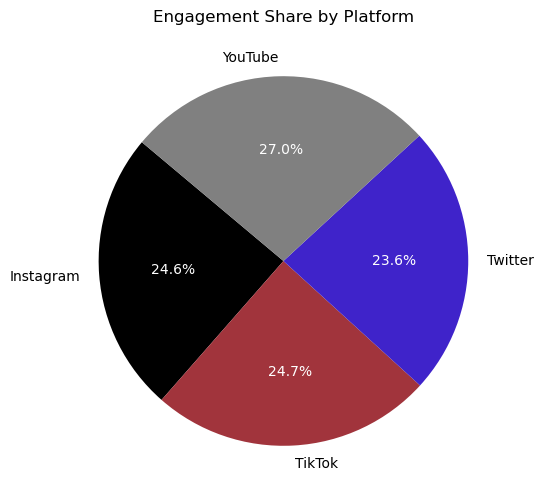

In [36]:
#Platform Performance

platform_perf = df.groupby('Platform')['Engagement_Score'].mean().sort_values(ascending=False)
print(platform_perf)

platform_share = df.groupby('Platform')['Engagement_Score'].sum()
colors = ['#000000', '#a1343c', '#3f23ca', '#808080']

plt.figure(figsize=(6,6))

# autopct function for white text inside
def func(pct):
    return f"{pct:.1f}%"  # format percentage

wedges, texts, autotexts = plt.pie(
    platform_share,
    labels=platform_share.index,
    autopct=func,
    startangle=140,
    colors=colors
)

# Set colors
for t in texts:   # outside labels
    t.set_color("black")
for at in autotexts:  # inside percentages
    at.set_color("white")

plt.title('Engagement Share by Platform')
plt.show()


In [41]:
# Save cleaned dataframe
df.to_excel("socialmedia_data_cleaned.xlsx", index=False)